In [7]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
sns.set_context('notebook')

In [8]:
# preds = pd.read_csv('/Users/user/repos/gz-jwst/results/test_predictions.csv')
preds = pd.read_parquet('/Users/user/repos/gz-jwst/results/test_predictionssummary_friendly.parquet')
preds = preds.rename(columns=dict(zip(preds.columns.values,[col.replace('jwst', 'ml') for col in preds.columns.values])))

preds['id_str'] = preds['id_str'].astype(int)
preds

,id_str,hdf5_loc,smooth-or-featured-ml_smooth_fraction,smooth-or-featured-ml_featured-or-disk_fraction,smooth-or-featured-ml_star-artifact-zoom_fraction,disk-edge-on-ml_yes_fraction,disk-edge-on-ml_no_fraction,has-spiral-arms-ml_yes_fraction,has-spiral-arms-ml_no_fraction,bar-ml_strong_fraction,...,spiral-arm-count-ml_cant-tell_fraction,clumps-ml_yes_fraction,clumps-ml_no_fraction,merging-ml_none_fraction,merging-ml_minor-disturbance_fraction,merging-ml_major-disturbance_fraction,merging-ml_merger_fraction,problem-ml_star_fraction,problem-ml_artifact_fraction,problem-ml_bad-zoom_fraction
0,22615,test_predictions.hdf5,0.563942,0.337515,0.098543,NaN,NaN,NaN,NaN,NaN,...,NaN,0.150174,0.849826,0.628316,0.307455,0.044674,0.019555,NaN,NaN,NaN
1,4389,test_predictions.hdf5,0.473793,0.123579,0.402628,NaN,NaN,NaN,NaN,NaN,...,NaN,0.439567,0.560433,0.502046,0.319960,0.081944,0.096049,NaN,NaN,NaN
2,28443,test_predictions.hdf5,0.641872,0.094559,0.263568,NaN,NaN,NaN,NaN,NaN,...,NaN,0.267874,0.732126,0.761670,0.188920,0.034543,0.014868,NaN,NaN,NaN
3,11090,test_predictions.hdf5,0.640018,0.201060,0.158922,NaN,NaN,NaN,NaN,NaN,...,NaN,0.313333,0.686667,0.323048,0.405022,0.245607,0.026323,NaN,NaN,NaN
4,19397,test_predictions.hdf5,0.603720,0.153238,0.243042,NaN,NaN,NaN,NaN,NaN,...,NaN,0.335382,0.664618,0.292732,0.455138,0.228996,0.023134,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,22438,test_predictions.hdf5,0.429178,0.434161,0.136661,NaN,NaN,NaN,NaN,NaN,...,NaN,0.422018,0.577982,0.469363,0.340634,0.067687,0.122315,NaN,NaN,NaN
1532,13185,test_predictions.hdf5,0.442534,0.151487,0.405980,NaN,NaN,NaN,NaN,NaN,...,NaN,0.390789,0.609211,0.576194,0.306281,0.084854,0.032671,NaN,NaN,NaN
1533,6822,test_predictions.hdf5,0.559561,0.048270,0.392169,NaN,NaN,NaN,NaN,NaN,...,NaN,0.273276,0.726724,0.642150,0.277253,0.055443,0.025154,NaN,NaN,NaN
1534,23476,test_predictions.hdf5,0.541873,0.094256,0.363871,NaN,NaN,NaN,NaN,NaN,...,NaN,0.273786,0.726214,0.688641,0.229843,0.057757,0.023759,NaN,NaN,NaN


In [9]:


train = pd.read_parquet('/Users/user/repos/galaxy-datasets/roots/gz_jwst/jwst_train_catalog.parquet')
test = pd.read_parquet('/Users/user/repos/galaxy-datasets/roots/gz_jwst/jwst_test_catalog.parquet')
df = pd.concat([train, test])


# slight hack as I used subject_id as the filename semi-accidentally
df['file_loc'] = df.apply(lambda x: os.path.join('/Users/user/repos/galaxy-datasets/roots/gz_jwst/images', str(x['subject_id'])+'.jpg'), axis=1)

df = pd.merge(df, preds, on='id_str', how='left', validate='one_to_one')

vols = pd.read_csv('/Users/user/repos/gz-jwst/data/jwst-ceers-v0-5_reduced_votes.csv')
df = pd.merge(df, vols, on='id_str', how='left', validate='one_to_one')

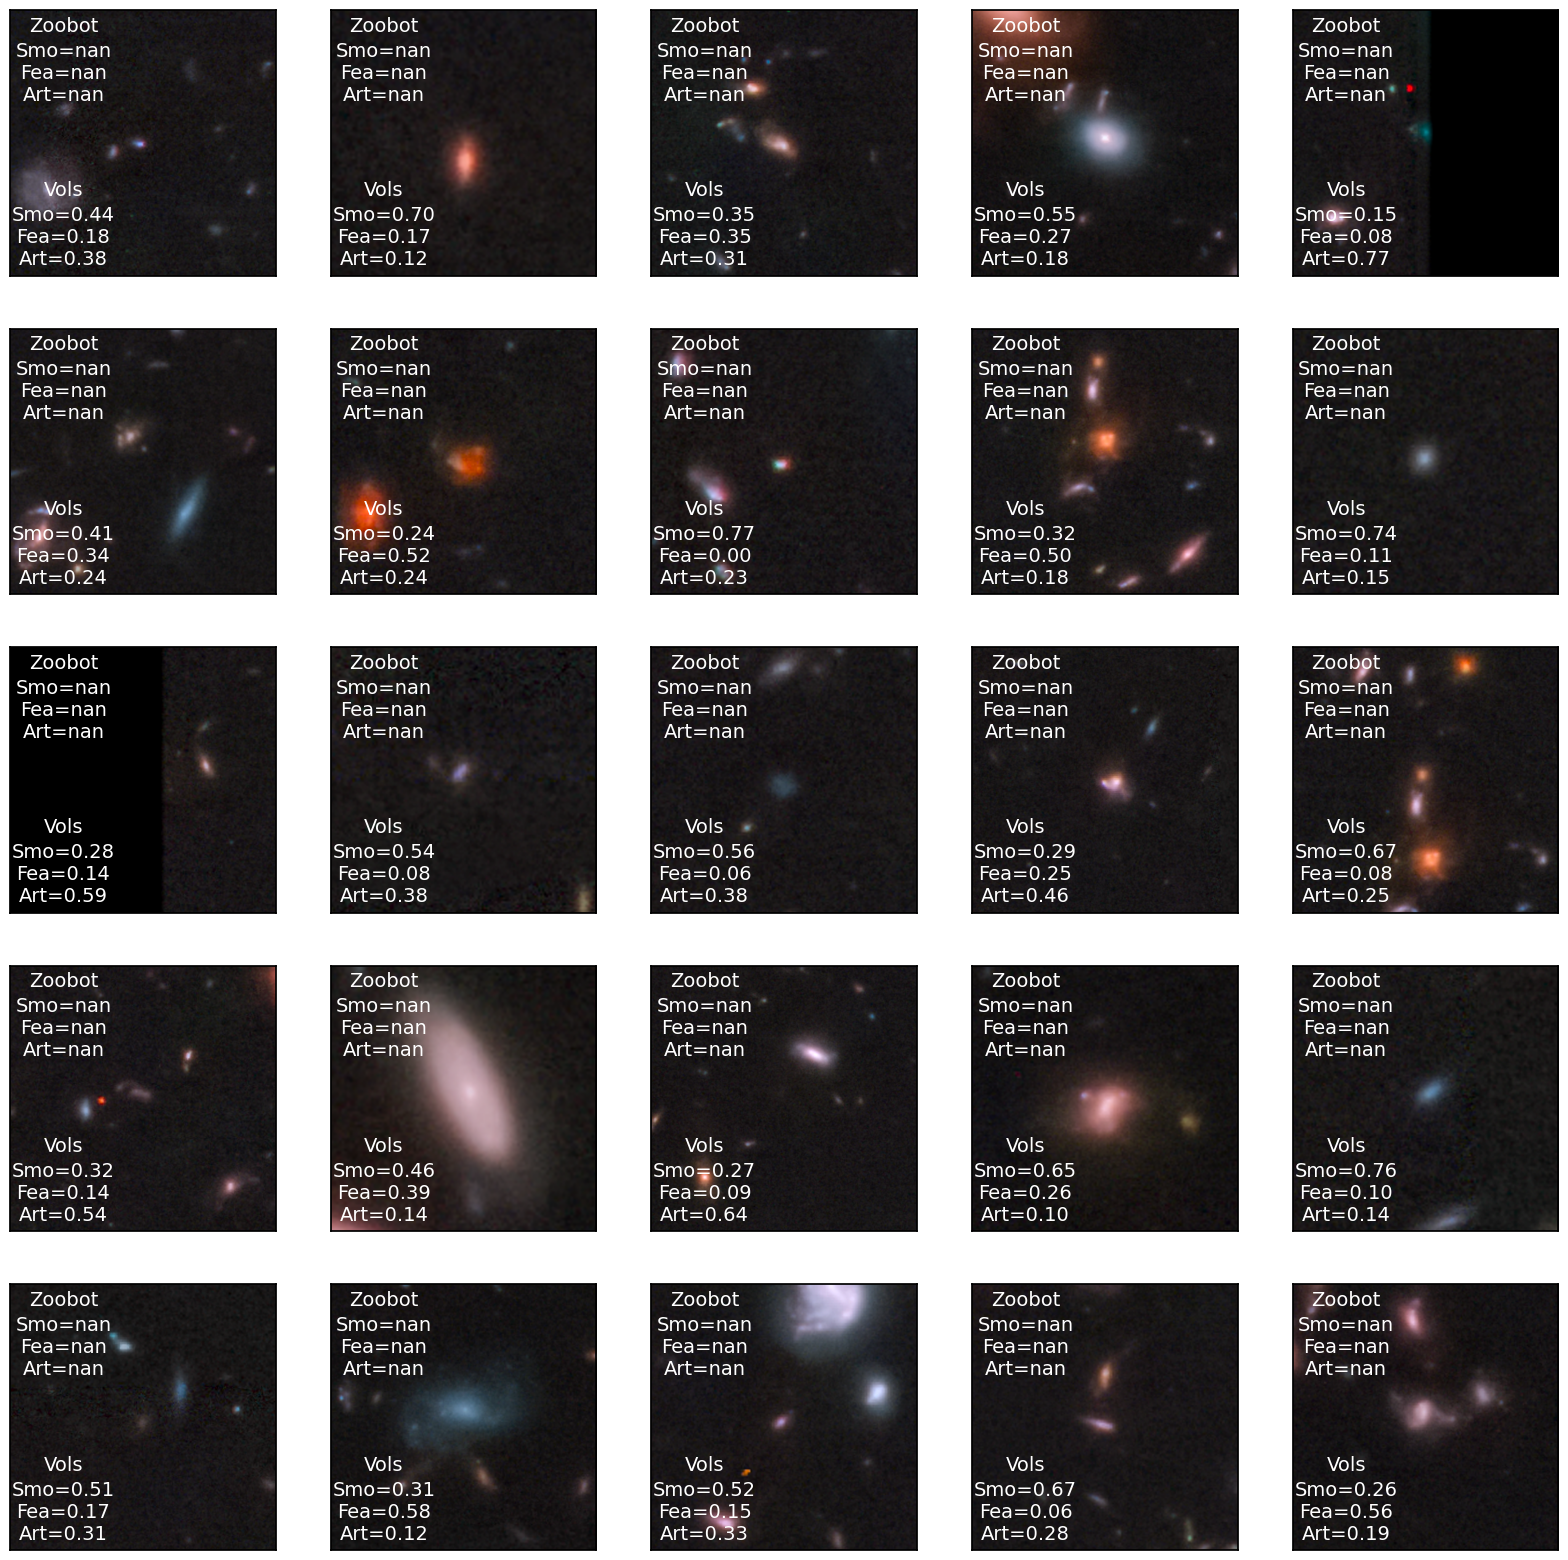

In [10]:
# plot a row of images with a text label for each image

def plot_images(df, rows, cols, figsize=(20, 20)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        galaxy = df.iloc[i]
        ax.imshow(Image.open(galaxy['file_loc']))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(100, 40, 'Zoobot', fontsize=14, color='white',  ha='center')
        ax.text(100, 170, 'Smo={:.2f}\nFea={:.2f}\nArt={:.2f}'.format(galaxy['smooth-or-featured-ml_smooth_fraction'], galaxy['smooth-or-featured-ml_featured-or-disk_fraction'], galaxy['smooth-or-featured-ml_star-artifact-zoom_fraction']), fontsize=14, color='white',  ha='center')
        
        ax.text(100, 350, 'Vols', fontsize=14, color='white',  ha='center')
        ax.text(100, 480, 'Smo={:.2f}\nFea={:.2f}\nArt={:.2f}'.format(galaxy['smooth-or-featured_smooth_fraction'], galaxy['smooth-or-featured_featured-or-disk_fraction'], galaxy['smooth-or-featured_star-artifact-zoom_fraction']), fontsize=14, color='white',  ha='center')
        
    plt.show()

plot_images(df, 5, 5, figsize=(20, 20))

Text(0, 0.5, 'Galaxies')

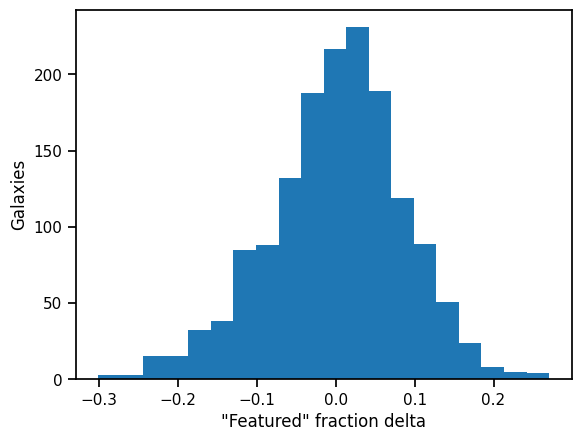

In [11]:
plt.hist(df['smooth-or-featured-ml_featured-or-disk_fraction'] - df['smooth-or-featured_featured-or-disk_fraction'], bins=20)
plt.xlabel('"Featured" fraction delta')
plt.ylabel('Galaxies')


In [12]:
(np.abs(df['smooth-or-featured-ml_featured-or-disk_fraction'] - df['smooth-or-featured_featured-or-disk_fraction']) > 0.1).mean()

0.04818335720796979

In [13]:
df.to_csv('jwst_ceers_volunteers_with_zoobot.csv', index=False)

In [14]:
df.head()

,subject_id,retired,RA,id_str,Dec,image,brtfac,pixrad,nircam_id,mag_select,...,bulge-size_dominant_fraction,merging_merger_fraction,merging_major-disturbance_fraction,merging_minor-disturbance_fraction,merging_none_fraction,clumps_yes_fraction,clumps_no_fraction,problem_star_fraction,problem_artifact_fraction,problem_bad-zoom_fraction
0,88106470,None,214.994538,5475,53.002489,g3621_nircam1_ceers.png,1.25,113,3621,23.44,...,0.2,0.047619,0.190476,0.190476,0.571429,0.500000,0.500000,0.230769,0.000,0.769231
1,88114365,"{'classifications_count': 40.0, 'created_at': ...",214.842769,21959,52.886358,g2572_nircam3_ceers.png,1.2477758147639406,46,2572,22.85,...,1.0,0.000000,0.000000,0.228571,0.771429,0.000000,1.000000,0.400000,0.000,0.600000
2,88117656,None,214.868136,31108,52.850473,g2957_nircam6_ceers.png,1.2003593198320148,107,2957,21.45,...,0.0,0.055556,0.333333,0.500000,0.111111,0.222222,0.777778,0.125000,0.125,0.750000
3,88117061,None,214.829720,29946,52.807210,g1795_nircam6_ceers.png,1.0,117,1795,17.6,...,0.0,0.000000,0.000000,0.333333,0.666667,0.000000,1.000000,0.666667,0.000,0.333333
4,88116575,None,214.823142,29152,52.793631,g1001_nircam6_ceers.png,1.2046852067450047,96,1001,21.53,...,0.0,0.166667,0.000000,0.500000,0.333333,1.000000,0.000000,0.050000,0.250,0.700000
